In [265]:
import numpy as np
import pandas as pd
import math
import operator
import matplotlib.pyplot as plt

In [266]:
def get_test_train(location):
    location = '~/Documents/SMAI/Assignment2/' + location
    dataframe = pd.read_csv(location)
    train  = dataframe[:int(0.8*len(dataframe))]
    test = dataframe[int(0.8*len(dataframe)):]
    return test,train

In [267]:
def minkowski_predict(test_row,train_row,power,target):
    dist = 0
    for attribute in range(0,len(test_row)):
        if attribute != target:
            dist+=(pow(abs(test_row[attribute] - train_row[attribute]),power))
    return dist 

In [268]:
def getsecond(item):
    return item[1]


def KNN(test,train,K,dist_measure,target):
    unique_values = np.unique(train.values[:,target])
    maxval = -1
    winner = None
    class_dict = {}
    for classVal in unique_values:
        class_dict[classVal] = 0
  
    if dist_measure == 'euclid':
        power = 2
    elif dist_measure == 'cheby':
        power = 1
    predicted = []
    for test_row in test.values:
        #print(test_row)
        knn = []
        maxval = -1
        winner = None
        for train_row in train.values:
            #print(train_row)
            #print(test_row)
            y = minkowski_predict(test_row,train_row,power,target)
            #print(y)
            knn.append((train_row[target],y))
        knn.sort(key = getsecond)
        
        #print(knn)
        for i in range(0,K):
            class_dict[knn[i][0]]+=1
            #if class_dict[knn[i][0]] > maxval:
            #    winner = knn[i][0]
            #    maxval = class_dict[knn[i][0]]
        winner = max(class_dict.items(),key=operator.itemgetter(1))[0]    
        predicted.append(winner)
        #print(class_dict)
        for classVal in unique_values:
            class_dict[classVal] = 0
    return predicted        

In [308]:
def BinaryMeasure(predicted_y,test,target):
    j = 0
    TN=0
    TP=0
    FN=0
    FP=0
    for i in predicted_y:
        if i==0 and i == (test.values)[j][target]:
            TN+=1
        elif i==0 and i!= (test.values)[j][target]:
            FN+=1
        elif i==1 and i == (test.values)[j][target]:
            TP+=1
        elif i==1 and i!= (test.values)[j][target]:
            FP+=1
        j+=1
        
    accuracy =  (TP+TN)/(TP+TN+FP+FN)
    precision = (TP)/(TP+FP)
    recall = (TP)/(TP+FN)
    fscore = 2/((1/precision)+(1/recall))
    return accuracy,precision,recall,fscore

In [313]:
def MultipleMeasure(predicted_y,test,train,target):
    j=0
    unique_classes = np.unique(train.values[:,target])
    accuracy = 0
    precision = 0
    recall = 0
    fscore = 0

    class_dict = {}
    for lclass in unique_classes:
        class_dict[lclass] = 0
   
    for i in (test.values)[:,target]:
        class_dict[i]+=1
        j+=1
    j=0
    
    size = test.shape[0]
    
    for lclass in unique_classes:
        TN=0
        TP=0
        FN=0
        FP=0
        freq = class_dict[lclass]
        for i in predicted_y:
            if lclass == (test.values)[j][target] and i==lclass: 
                TP+=1
            elif lclass!= (test.values)[j][target] and i==lclass:
                FP+=1
            elif lclass!= (test.values)[j][target] and i!=lclass:
                TN+=1
            elif lclass == (test.values)[j][target] and i!=lclass:
                FN+=1
            j+=1
        j=0    

        accuracy +=  (freq/size)*((TP+TN)/(TP+TN+FP+FN))
        precision += (freq/size)*((TP)/(TP+FP))
        recall += (freq/size)*((TP)/(TP+FN))
        fscore += (freq/size)*(2/((1/precision)+(1/recall)))
    return accuracy,precision,recall,fscore

## Question - 1
### A. Datasets -- Robot1 and Robot2

### 1. Implement a KNN classifier for each of the datasets. Report precision, recall, f1 score and accuracy. Compare your result with in-built(scikit-learn) KNN function to check correctness of your algorithm.

In [314]:
#Robot1
location = 'RobotDataset/Robot1'
test,train = get_test_train(location)
test = pd.DataFrame(np.delete(test.values,7,1))
train = pd.DataFrame(np.delete(train.values,7,1))
K = 7
target = 0
predicted_y = KNN(test,train,K,'euclid',target)
accuracy,precision,recall,fscore = BinaryMeasure(predicted_y,test,target)
print("Robot1")
print("===================================")
print("Accuracy = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("fscore = ",fscore)

print("\n")

#Robot2
location = 'RobotDataset/Robot2'
test,train = get_test_train(location)
test = pd.DataFrame(np.delete(test.values,7,1))
train = pd.DataFrame(np.delete(train.values,7,1))
K = 7
target = 0
predicted_y = KNN(test,train,K,'euclid',target)
accuracy,precision,recall,fscore = BinaryMeasure(predicted_y,test,target)
print("Robot2")
print("===================================")
print("Accuracy = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("fscore = ",fscore)

print("\n")

#Iris
location = 'Iris/Iris.csv'
test,train = get_test_train(location)
K = 7
target = 4
predicted_y = KNN(test,train,K,'euclid',target)
accuracy,precision,recall,fscore = MultipleMeasure(predicted_y,test,train,target)
print("Iris")
print("===================================")
print("Accuracy = ",accuracy)
print("Precision = ",precision)
print("Recall = ",recall)
print("fscore = ",fscore)


Robot1
Accuracy =  0.84
Precision =  1.0
Recall =  0.8095238095238095
fscore =  0.8947368421052632


Robot2
Accuracy =  0.92
Precision =  1.0
Recall =  0.8181818181818182
fscore =  0.8999999999999999


Iris
Accuracy =  0.9780521262002742
Precision =  0.9682539682539681
Recall =  0.9629629629629629
fscore =  0.6615986914139392


### 2. Use different distance measures as applicable. Plot graph to report accuracy with change in value of K. Also suggest possible reason for better performance.

In [319]:
def gen_KNN_plot(test,train,target,binary):
    distanceMeasures = ['euclid','cheby'] 
    accuracy_array1 = []
    accuracy_array2 = []
    for dist_measure in distanceMeasures:
        K = 1
        K_array = []
        accuracy_array2 = []
        while K<= math.sqrt(len(train)):
            predicted_y = KNN(test,train,K,dist_measure,target)
            if binary == 1:
                accuracy,precision,recall,fscore = BinaryMeasure(predicted_y,test,target)
            elif binary == 0:
                accuracy,precision,recall,fscore = MultipleMeasure(predicted_y,test,train,target)
            K_array.append(K)
            accuracy_array2.append(accuracy)
            K+=2
        if dist_measure == 'euclid':    
            accuracy_array1 = accuracy_array2.copy()    
    plt.plot(K_array,accuracy_array1,c='b',label = 'euclid')
    plt.plot(K_array,accuracy_array2,c='r',label = 'chebychev')
    plt.legend()
    plt.show()


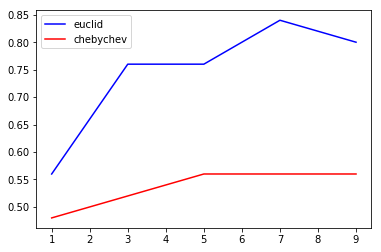

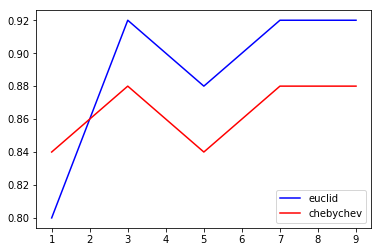

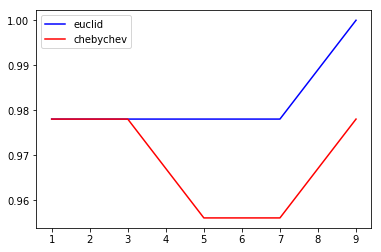

In [320]:
location = 'RobotDataset/Robot1'
test,train = get_test_train(location)
test = pd.DataFrame(np.delete(test.values,7,1))
train = pd.DataFrame(np.delete(train.values,7,1))
target=0
binary = 1
gen_KNN_plot(test,train,target,binary)

location = 'RobotDataset/Robot2'
test,train = get_test_train(location)
test = pd.DataFrame(np.delete(test.values,7,1))
train = pd.DataFrame(np.delete(train.values,7,1))
target=0
binary=1
gen_KNN_plot(test,train,target,binary)

location = 'Iris/Iris.csv'
test,train = get_test_train(location)
target = 4
binary=0
gen_KNN_plot(test,train,target,binary)